# The Ultimate Challenge 
## Part 1: Exploratory Data Analysis 

Import the libraries and data needed here:

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_json('logins.json')

In [3]:
df1.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

Aggregate these login counts based on 15 - minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

convert to datetime 

In [79]:
df1 = pd.DataFrame(pd.to_datetime(df1['login_time']),columns=['login_time'])

In [80]:
df1.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [81]:
df1['count'] = 1

In [82]:
df1.head()

login_time  count
0 1970-01-01 20:13:18      1
1 1970-01-01 20:16:10      1
2 1970-01-01 20:16:37      1
3 1970-01-01 20:16:36      1
4 1970-01-01 20:26:21      1

check for missing values

In [83]:
df1[df1['login_time'].isna()].sum()

login_time    0.0
count         0.0
dtype: float64

In [86]:
#set login time as index for resampling
df1.index = df1['login_time']

In [88]:
df1.drop('login_time', axis =1, inplace=True)

In [89]:
df1.head()

count
login_time                
1970-01-01 20:13:18      1
1970-01-01 20:16:10      1
1970-01-01 20:16:37      1
1970-01-01 20:16:36      1
1970-01-01 20:26:21      1

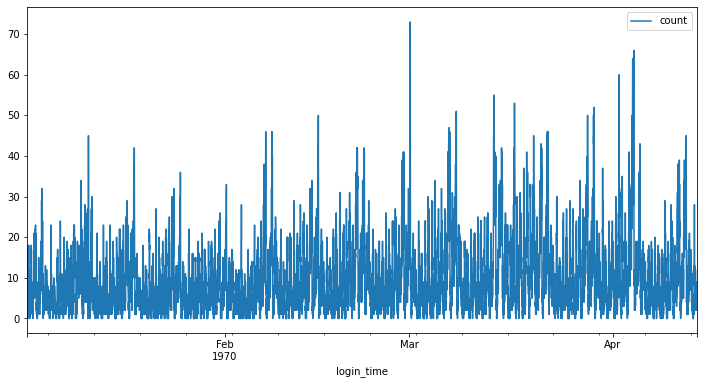

In [90]:
df_count = df1.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

In [91]:
df_count.describe()

count
count  9788.000000
mean      9.515938
std       8.328818
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      73.000000

In [92]:
df_count.max()

count    73
dtype: int64

In [93]:
df_count.idxmax(axis=0, skipna=True)

count   1970-03-01 04:30:00
dtype: datetime64[ns]

In [94]:
df_count.idxmin(axis=0, skipna=True)

count   1970-01-01 21:30:00
dtype: datetime64[ns]

In [95]:
31*24*60/15

2976.0

the maximum useage was on Sunday, March 1st, 1970. The minimum usage was Jan. 1st, 1970.

Text(0, 0.5, 'Count')

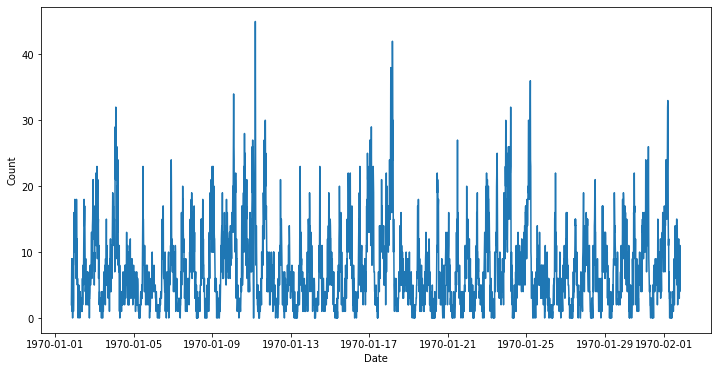

In [100]:
plt.figure(figsize=(12,6))
plt.plot(df_count[0:2976])
plt.xlabel('Date')
plt.ylabel('Count')

It looks as though the first month is quite cyclic in that there appears to be a pattern in usage.

In [102]:
df_count[0:2976].idxmax(axis=0, skipna=True)

count   1970-01-11 04:45:00
dtype: datetime64[ns]

In [114]:
96*7

672

Text(0, 0.5, 'Count')

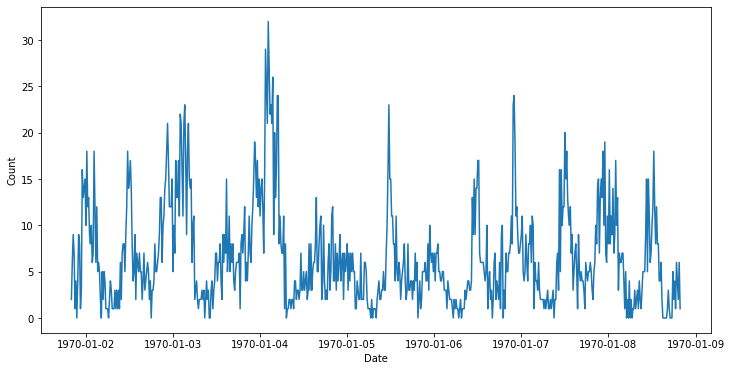

In [115]:
plt.figure(figsize=(12,6))
plt.plot(df_count[0:672])
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

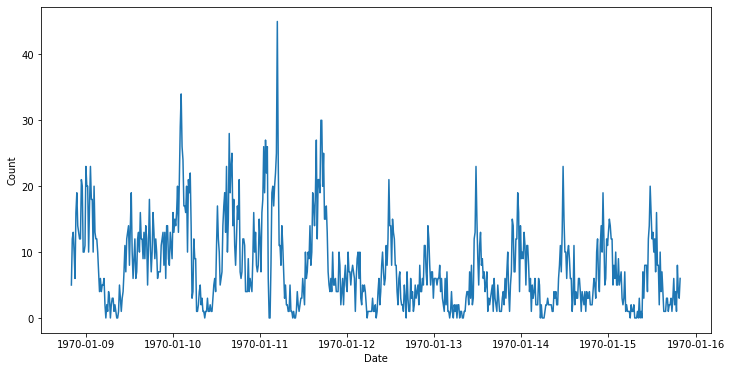

In [116]:
plt.figure(figsize=(12,6))
plt.plot(df_count[672:1344])
plt.xlabel('Date')
plt.ylabel('Count')

It appears that sunday is the max day for every week though there is a decline as the month progresses. This trend is also seen in the above data. Though a period in March there appears to be deviation at the end of the month. There is also a daily pattern to the data as well. This is day of the week dependent. 

## Part 2:Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
I think there are a few ways to go about this. First you could look at the number of drivers using the toll bridge. If the number of drivers increased odds are there is an overall increase. looking at if there are more drivers going from Metropolis to Gotham at night during the week would indicate that there is in increase from the Metropolis drivers and during the day time if there are more drivers going from Gotham to Metropolis. 
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
Prior to the experiment it could be possible to determine the number of drivers that use the bridge daily using those pressure cables that are often used to determine traffic patterns for installing traffic lights. However, this would only tell us about the drivers cross NOT the partners. This could be determined using app information if the partners are like let's say uber or lyft. receiving the data of people being picked up and brought across the bridge. This however does not account for the people that would prefer to do all their rides on the opposite side of the bridge from where they live. This would need to be calrified if they are being reimbursed or if it is only for driver that are transporting a rider across the bridge that will be reimbursed. Ultimately if neither option is available, tracking the amount of money reimbursed and to whom is goes to would also be an option. It is less ideal as I am sure there is a subset of people that will forget to request the reimbursement. It would also take longer to implement as it would probably take a few weeks to months of data collection for the information to really show if the traffic increased. 


b. what statistical test(s) you will conduct to verify the significance of the
observation
knowing the amount of drivers that used the bridge over the course of a week before and the amount of drivers that used the bridge would allow for one to use a simple t-test. If there was a statistical difference you could see it with that. Essentiall all of the options I gave above would allow for a simple t-test to be implemented. 

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
I would first see there was a statistical difference in the drivers over the course of a week. if there was, it might be helpful to see if there is a difference in the previous weekday to current weekday traffic and also for weekends. If there is a change in traffic patterns for one of those it may be beneficial for the city to change the reimbursements to the times of the most traffic across the bridge either week days or weekends pending the results. If there is not a significance, then reimbursement for the costs may be more trouble than it is worth. Before completely removing this a discussion of possibly the announcements or ads to the cities may need to be adjusted and the experiment rerun. 


## Part 3: Predictive Modeling 

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

We consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

Import the data and any packages needed

In [4]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [5]:
df2.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [6]:
df2.shape

(50000, 12)

In [7]:
import pandas_profiling

In [8]:
report = df2.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

It appears there are several duplicate rows and a few rows missing avg rating of driver, phone, and avg rating by driver.

In [9]:
df2.drop_duplicates(inplace = True)

In [10]:
df2.shape

(49992, 12)

In [11]:
df2['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [12]:
import matplotlib.pyplot as plt

In [13]:
df2['phone'].value_counts()

iPhone     34578
Android    15018
Name: phone, dtype: int64

Since iphones are already the vast majority I am going to use the most frequent to fill for phones. This could potentially skew the data if looking at phone usage. 

In [14]:
df2['phone'].fillna('iPhone',inplace= True)

In [15]:
df2['phone'].unique()

array(['iPhone', 'Android'], dtype=object)

In [16]:
df2['avg_rating_of_driver'].describe()

count    41873.000000
mean         4.601512
std          0.617360
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [17]:
df2['avg_rating_of_driver'].fillna(4.60, inplace =True)

In [18]:
df2['avg_rating_by_driver'].describe()

count    49791.000000
mean         4.778123
std          0.446679
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [19]:
df2['avg_rating_by_driver'].fillna(4.78, inplace =True)

In [20]:
na_df=pd.DataFrame(df2.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

Empty DataFrame
Columns: [VarName, NullCount]
Index: []

This should have handeled the missing data.

First I need to convert the dates to datetime. Then add a column for if they were indeed 'active'

In [21]:
df2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [22]:
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

In [23]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'])

In [24]:
current_date = df2['last_trip_date'].max()

In [25]:
current_date

Timestamp('2014-07-01 00:00:00')

Most recent date is in July. So this is looking at Jan - July. Active in the previous 30 days would be if the current date minus the date is less than 30. 

In [26]:
df2['active'] = df2['last_trip_date'].apply(lambda date: 1 if (current_date-date).days<30 else 0)
df2.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  active  
0         46.2      3.67                   5.0       1  
1         50.0      8.26                   5.0       0  
2        100.0      0.77                   5.0       0  
3         80.0      2.36                   4.9       1  
4         82.4      3.13                   4.9       0

In [110]:
df2['city'].value_counts()

Winterfell        23331
Astapor           16531
King's Landing    10130
Name: city, dtype: int64

In [27]:
df2['active'].sum()/49992

0.3662586013762202

Answer 1: only 37.61% of the users are currently active in the last 30 days. 

several portions of the data are infact in strings to build the model they need to be in numerics so I need to generate dummy variables.

In [28]:
df_features = pd.get_dummies(df2,columns=['city','phone','ultimate_black_user'])
df_features.head()

trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                       4  2014-01-25                   4.7       1.10   
1                       0  2014-01-29                   5.0       1.00   
2                       3  2014-01-06                   4.3       1.00   
3                       9  2014-01-10                   4.6       1.14   
4                      14  2014-01-27                   4.4       1.19   

  last_trip_date  surge_pct  weekday_pct  avg_dist  avg_rating_by_driver  \
0     2014-06-17       15.4         46.2      3.67                   5.0   
1     2014-05-05        0.0         50.0      8.26                   5.0   
2     2014-01-07        0.0        100.0      0.77                   5.0   
3     2014-06-29       20.0         80.0      2.36                   4.9   
4     2014-03-15       11.8         82.4      3.13                   4.9   

   active  city_Astapor  city_King's Landing  city_Winterfell  phone_Android  \
0       1             0                    1                0              0   
1       0             1                    0                0              1   
2       0             1                    0                0              0   
3       1             0                    1                0              0   
4       0             0                    0                1              1   

   phone_iPhone  ultimate_black_user_False  ultimate_black_user_True  
0             1                          0                         1  
1             0                          1                         0  
2             1                          1                         0  
3             1                          0                         1  
4             0                          1                         0

our goal is to model 'active', which is if the user is active in the last 30 days. 

In [29]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heat Map')

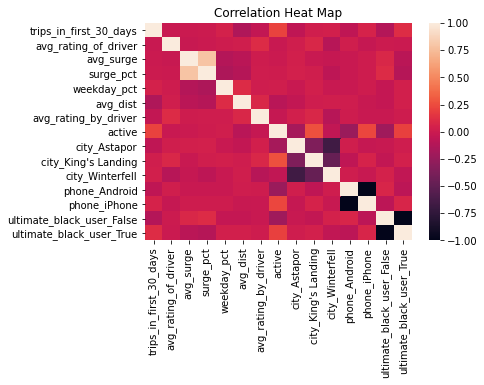

In [30]:
sns.heatmap(df_features.corr())
plt.title('Correlation Heat Map')

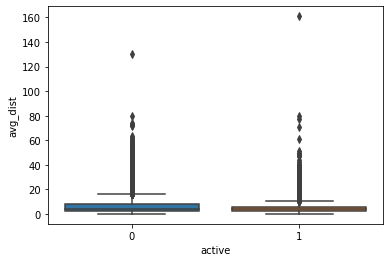

In [31]:
sns.boxplot(data=df_features,x='active',y='avg_dist')

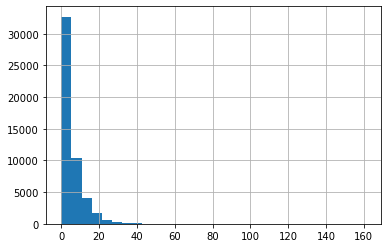

In [32]:
df2['avg_dist'].hist(bins =30)

In [33]:
pd.pivot_table(df2,index='active',aggfunc={'avg_dist':['mean','std']})

avg_dist          
            mean       std
active                    
0       6.189260  6.213470
1       5.118977  4.627946

Looking at the average distance traveled the active users appear to have traveled more shorter distances but overall they appear quite similar in distance traveled. there is a slightly wider spread. Even the histogram does not show a bimodal tendency in this. Were the riders turned off by a bad rating?

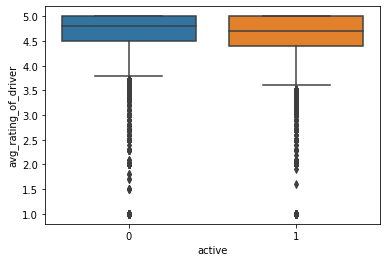

In [34]:
sns.boxplot(data=df2,x='active',y='avg_rating_of_driver')

In [35]:
pd.pivot_table(df2,index='active',aggfunc={'avg_rating_of_driver':['mean','std']})

avg_rating_of_driver          
                       mean       std
active                               
0                  4.605505  0.592149
1                  4.593932  0.514609

This shows that the active users appear to give a bit more of a range on their reviews. Probably due to having more experiences to reference. I expected there to be more lower ratings and spread with the inactive users possibly that had a bad experience. 

## Build a predictive model:
Determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

I decided to use a 70-30 split of training to test data

In [43]:
y= df_features['active']

In [53]:
X = df_features.drop(['active','signup_date','last_trip_date'],axis=1)

In [54]:
X.head()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   weekday_pct  avg_dist  avg_rating_by_driver  city_Astapor  \
0         46.2      3.67                   5.0             0   
1         50.0      8.26                   5.0             1   
2        100.0      0.77                   5.0             1   
3         80.0      2.36                   4.9             0   
4         82.4      3.13                   4.9             0   

   city_King's Landing  city_Winterfell  phone_Android  phone_iPhone  \
0                    1                0              0             1   
1                    0                0              1             0   
2                    0                0              0             1   
3                    1                0              0             1   
4                    0                1              1             0   

   ultimate_black_user_False  ultimate_black_user_True  
0                          0                         1  
1                          1                         0  
2                          1                         0  
3                          0                         1  
4                          1                         0

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [57]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [60]:
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.762
Random Forest: f1-score=0.761


This model gives about a 76% accuracy. 

In [63]:
class_names=['Active', 'Inactive'] # name  of classes

Confusion matrix, without normalization
[[7777 1701]
 [1870 3650]]
Normalized confusion matrix
[[0.82 0.18]
 [0.34 0.66]]


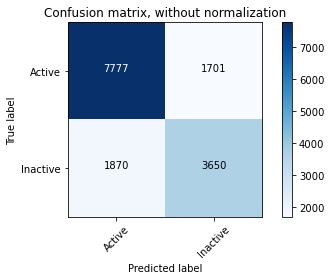

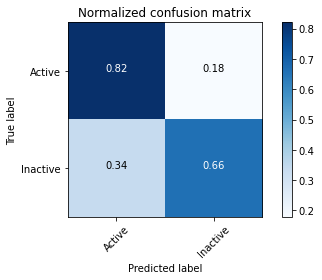

In [64]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

14


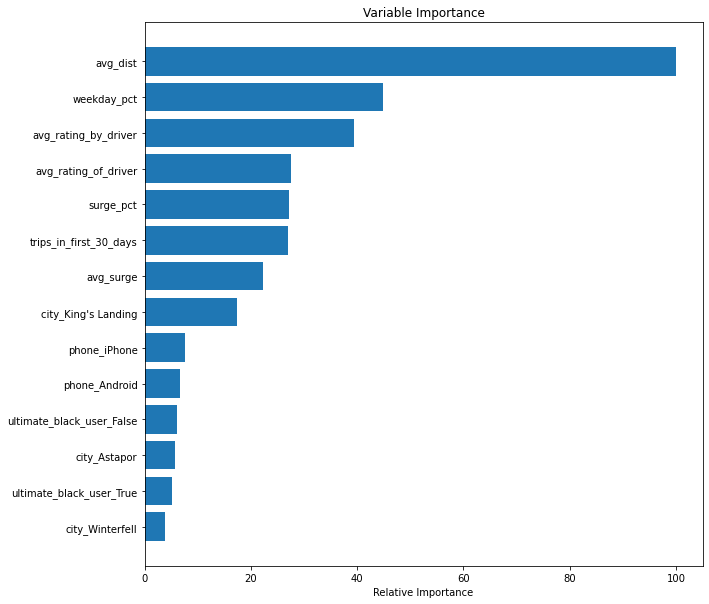

In [65]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [108]:
print(df_features['city_Winterfell'].sum())
print(df_features['city_Astapor'].sum())
print(df_features["city_King's Landing"].sum())

23331
16531
10130


There are several categories that do not seem very necessary to the model. including the type of phone, if they are a black user. The King's landing city appears to be the most useful of the city information. PCA could have helped to lower the dimensionality, but there is not an outrageous number of dimensions.  

Looking at the cities, Winterfell and Astapor had the most app usage, but King's landing had the most pull in the model. you can also see that distances play the most in the model. giving different rates for farther distances could help to increase distance rides, but ultimately the information that might be necessary in these arease are: are there universities in the area? most college students don't have cars. Where are the taking these rides to and from? hospitals, malls, museums? all of these could be playing a role in why certain cities have higher usage. If they are going to the grocery store most often maybe a ride bundle that equates to maybe $10-20 off a set number of rides would be appealing. 